In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Aaryant31/ML_Supervised_learning-Practice/main/Logistic%20Regression%20practice/HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
f=df[df.duplicated()]

In [7]:
len(f)

3008

In [8]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [9]:
duplicate = df[df.duplicated()]

In [10]:
df.iloc[14998]

satisfaction_level          0.37
last_evaluation             0.52
number_project                 2
average_montly_hours         158
time_spend_company             3
Work_accident                  0
left                           1
promotion_last_5years          0
Department               support
salary                       low
Name: 14998, dtype: object

In [11]:

df[(df['average_montly_hours']==158) & (df['last_evaluation']== 0.52)& (df.Department=='support')]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1962,0.37,0.52,2,158,3,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df.shape

(11991, 10)

In [15]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [16]:
df.left.value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [17]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018


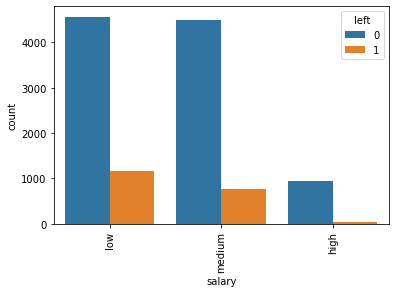

In [18]:
sns.countplot(hue='left',x='salary',data=df)
plt.xticks(rotation=90);

In [19]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
num= subdf.select_dtypes(exclude='object')

In [21]:
num

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0
...,...,...,...
11995,0.90,259,1
11996,0.74,266,1
11997,0.85,185,1
11998,0.33,172,1


In [22]:
saldf=subdf.select_dtypes(include='object')

In [23]:
dumval=pd.get_dummies(saldf,drop_first=True)

In [24]:
dumval

,salary_low,salary_medium
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
11995,0,0
11996,0,0
11997,0,0
11998,0,0


In [25]:
X= pd.concat([num,dumval],axis=1)

In [26]:
y=df.left

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scale=StandardScaler()

In [31]:
X_train=scale.fit_transform(X_train)

In [32]:
X_test=scale.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
model.score(X_train,y_train)

0.8588638680381799

In [37]:
y_pred=model.predict_proba(X_test)

In [38]:
y_pred

array([[0.89727094, 0.10272906],
       [0.76539471, 0.23460529],
       [0.79774904, 0.20225096],
       ...,
       [0.93970896, 0.06029104],
       [0.97587795, 0.02412205],
       [0.92510113, 0.07489887]])